In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix

In [ ]:
df = pd.read_csv('heart_data.csv')

In [ ]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [ ]:
df.sample(2)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
65,35,0,0,138,183,0,1,182,0,1.4,2,0,2,1
83,52,1,3,152,298,1,1,178,0,1.2,1,0,3,1


In [ ]:
df.shape

(303, 14)

In [ ]:
df['target'].value_counts()

1    165
0    138
Name: target, dtype: int64

In [ ]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [ ]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [ ]:
df.duplicated().sum()

1

In [ ]:
df.drop_duplicates(keep='first')

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [ ]:
df.duplicated().sum()

1

<ipython-input-15-a48f7051200a>:2: UserWarning: FixedFormatter should only be used together with FixedLocator
  bar.set_xticklabels(bar.get_xticklabels(), rotation = 90)


[Text(0, 0, '29'),
 Text(1, 0, '34'),
 Text(2, 0, '35'),
 Text(3, 0, '37'),
 Text(4, 0, '38'),
 Text(5, 0, '39'),
 Text(6, 0, '40'),
 Text(7, 0, '41'),
 Text(8, 0, '42'),
 Text(9, 0, '43'),
 Text(10, 0, '44'),
 Text(11, 0, '45'),
 Text(12, 0, '46'),
 Text(13, 0, '47'),
 Text(14, 0, '48'),
 Text(15, 0, '49'),
 Text(16, 0, '50'),
 Text(17, 0, '51'),
 Text(18, 0, '52'),
 Text(19, 0, '53'),
 Text(20, 0, '54'),
 Text(21, 0, '55'),
 Text(22, 0, '56'),
 Text(23, 0, '57'),
 Text(24, 0, '58'),
 Text(25, 0, '59'),
 Text(26, 0, '60'),
 Text(27, 0, '61'),
 Text(28, 0, '62'),
 Text(29, 0, '63'),
 Text(30, 0, '64'),
 Text(31, 0, '65'),
 Text(32, 0, '66'),
 Text(33, 0, '67'),
 Text(34, 0, '68'),
 Text(35, 0, '69'),
 Text(36, 0, '70'),
 Text(37, 0, '71'),
 Text(38, 0, '74'),
 Text(39, 0, '76'),
 Text(40, 0, '77')]

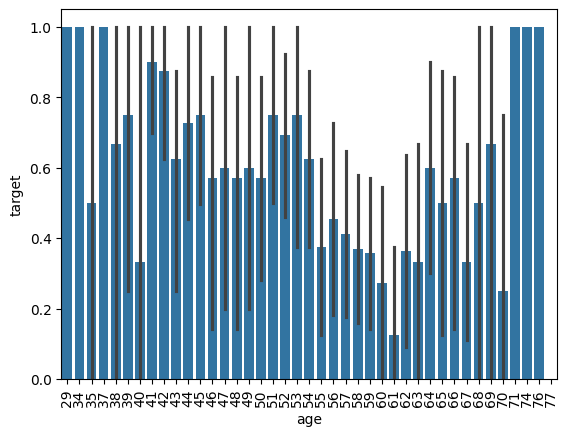

In [ ]:
bar = sns.barplot(data=df,x='age',y='target')
bar.set_xticklabels(bar.get_xticklabels(), rotation = 90)

<ipython-input-16-fc14a089f9e0>:2: UserWarning: FixedFormatter should only be used together with FixedLocator
  bar.set_xticklabels(bar.get_xticklabels(), rotation = 90)


[Text(0, 0, '94'),
 Text(1, 0, '100'),
 Text(2, 0, '101'),
 Text(3, 0, '102'),
 Text(4, 0, '104'),
 Text(5, 0, '105'),
 Text(6, 0, '106'),
 Text(7, 0, '108'),
 Text(8, 0, '110'),
 Text(9, 0, '112'),
 Text(10, 0, '114'),
 Text(11, 0, '115'),
 Text(12, 0, '117'),
 Text(13, 0, '118'),
 Text(14, 0, '120'),
 Text(15, 0, '122'),
 Text(16, 0, '123'),
 Text(17, 0, '124'),
 Text(18, 0, '125'),
 Text(19, 0, '126'),
 Text(20, 0, '128'),
 Text(21, 0, '129'),
 Text(22, 0, '130'),
 Text(23, 0, '132'),
 Text(24, 0, '134'),
 Text(25, 0, '135'),
 Text(26, 0, '136'),
 Text(27, 0, '138'),
 Text(28, 0, '140'),
 Text(29, 0, '142'),
 Text(30, 0, '144'),
 Text(31, 0, '145'),
 Text(32, 0, '146'),
 Text(33, 0, '148'),
 Text(34, 0, '150'),
 Text(35, 0, '152'),
 Text(36, 0, '154'),
 Text(37, 0, '155'),
 Text(38, 0, '156'),
 Text(39, 0, '160'),
 Text(40, 0, '164'),
 Text(41, 0, '165'),
 Text(42, 0, '170'),
 Text(43, 0, '172'),
 Text(44, 0, '174'),
 Text(45, 0, '178'),
 Text(46, 0, '180'),
 Text(47, 0, '192'),
 Te

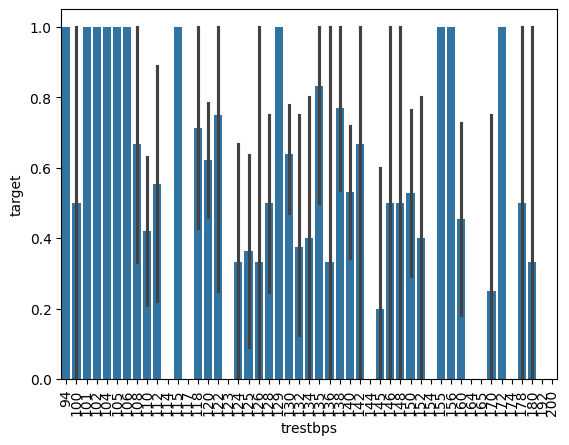

In [ ]:
bar = sns.barplot(data=df,x='trestbps',y='target')
bar.set_xticklabels(bar.get_xticklabels(), rotation = 90)

<Axes: >

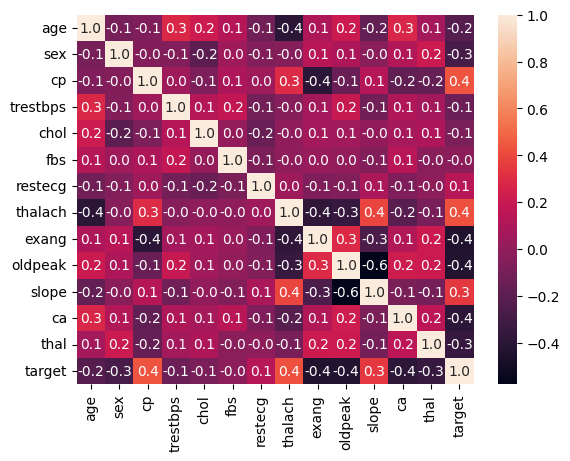

In [ ]:
correlation = df.corr()
sns.heatmap(correlation,annot=True,fmt=".1f")

In [ ]:
X = df.drop(columns='target',axis=1)
y = df['target']

In [ ]:
X

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3


In [ ]:
y

0      1
1      1
2      1
3      1
4      1
      ..
298    0
299    0
300    0
301    0
302    0
Name: target, Length: 303, dtype: int64

In [ ]:
se = StandardScaler()
X = se.fit_transform(X)

In [ ]:
X

array([[ 0.9521966 ,  0.68100522,  1.97312292, ..., -2.27457861,
        -0.71442887, -2.14887271],
       [-1.91531289,  0.68100522,  1.00257707, ..., -2.27457861,
        -0.71442887, -0.51292188],
       [-1.47415758, -1.46841752,  0.03203122, ...,  0.97635214,
        -0.71442887, -0.51292188],
       ...,
       [ 1.50364073,  0.68100522, -0.93851463, ..., -0.64911323,
         1.24459328,  1.12302895],
       [ 0.29046364,  0.68100522, -0.93851463, ..., -0.64911323,
         0.26508221,  1.12302895],
       [ 0.29046364, -1.46841752,  0.03203122, ..., -0.64911323,
         0.26508221, -0.51292188]])

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.4,shuffle=True,stratify=y,random_state=7)

In [ ]:
model = LogisticRegression()
model.fit(X_train,y_train)


LogisticRegression()

In [ ]:
X_train_pred = model.predict(X_train)
print("Accuracy Score : ",accuracy_score(X_train_pred,y_train))

Accuracy Score :  0.8674033149171271


In [ ]:
X_test_pred = model.predict(X_test)
print("Accuracy Score : ",accuracy_score(X_test_pred,y_test))

Accuracy Score :  0.8278688524590164


Testing Our model for (44,1,0,112,290,0,0,153,0,0,2,1,2,0)

In [ ]:
input_data = (44,1,0,112,290,0,0,153,0,0,2,1,2)
input_data = np.asarray(input_data)
input_data = input_data.reshape(1,-1)

prediction = model.predict(input_data)
prediction[0]

0

Confusion Matrix

In [ ]:
cf_matrix = confusion_matrix(y_test,X_test_pred)

<Axes: >

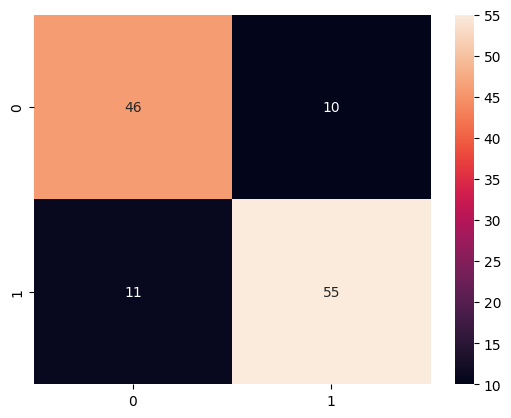

In [ ]:
sns.heatmap(cf_matrix,annot=True)